In [19]:
###################################
#            PACKAGES             #
###################################
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import logging
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno




In [20]:
##################################################
# T1.1.2. LOADING DATASET & EXAMINIG THE DATASET #      
##################################################
flu_df = pd.read_csv('../Data/training_set_labels.csv') 
flu_df2 = pd.read_csv('../Data/training_set_features.csv') 

In [21]:
import sys
print(sys.executable)


/usr/local/bin/python3


In [22]:
flu_df = pd.merge(flu_df, flu_df2, on='respondent_id', how='outer')


In [23]:
###################################
#        DIMENSIONS & INFO        #
###################################
print(flu_df.shape)
flu_df.describe()
print(f"Dataset shape: {flu_df.shape}")
print(flu_df.dtypes)


(26707, 38)
Dataset shape: (26707, 38)
respondent_id                    int64
h1n1_vaccine                     int64
seasonal_vaccine                 int64
h1n1_concern                   float64
h1n1_knowledge                 float64
behavioral_antiviral_meds      float64
behavioral_avoidance           float64
behavioral_face_mask           float64
behavioral_wash_hands          float64
behavioral_large_gatherings    float64
behavioral_outside_home        float64
behavioral_touch_face          float64
doctor_recc_h1n1               float64
doctor_recc_seasonal           float64
chronic_med_condition          float64
child_under_6_months           float64
health_worker                  float64
health_insurance               float64
opinion_h1n1_vacc_effective    float64
opinion_h1n1_risk              float64
opinion_h1n1_sick_from_vacc    float64
opinion_seas_vacc_effective    float64
opinion_seas_risk              float64
opinion_seas_sick_from_vacc    float64
age_group                

True
respondent_id                      0
h1n1_vaccine                       0
seasonal_vaccine                   0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                             

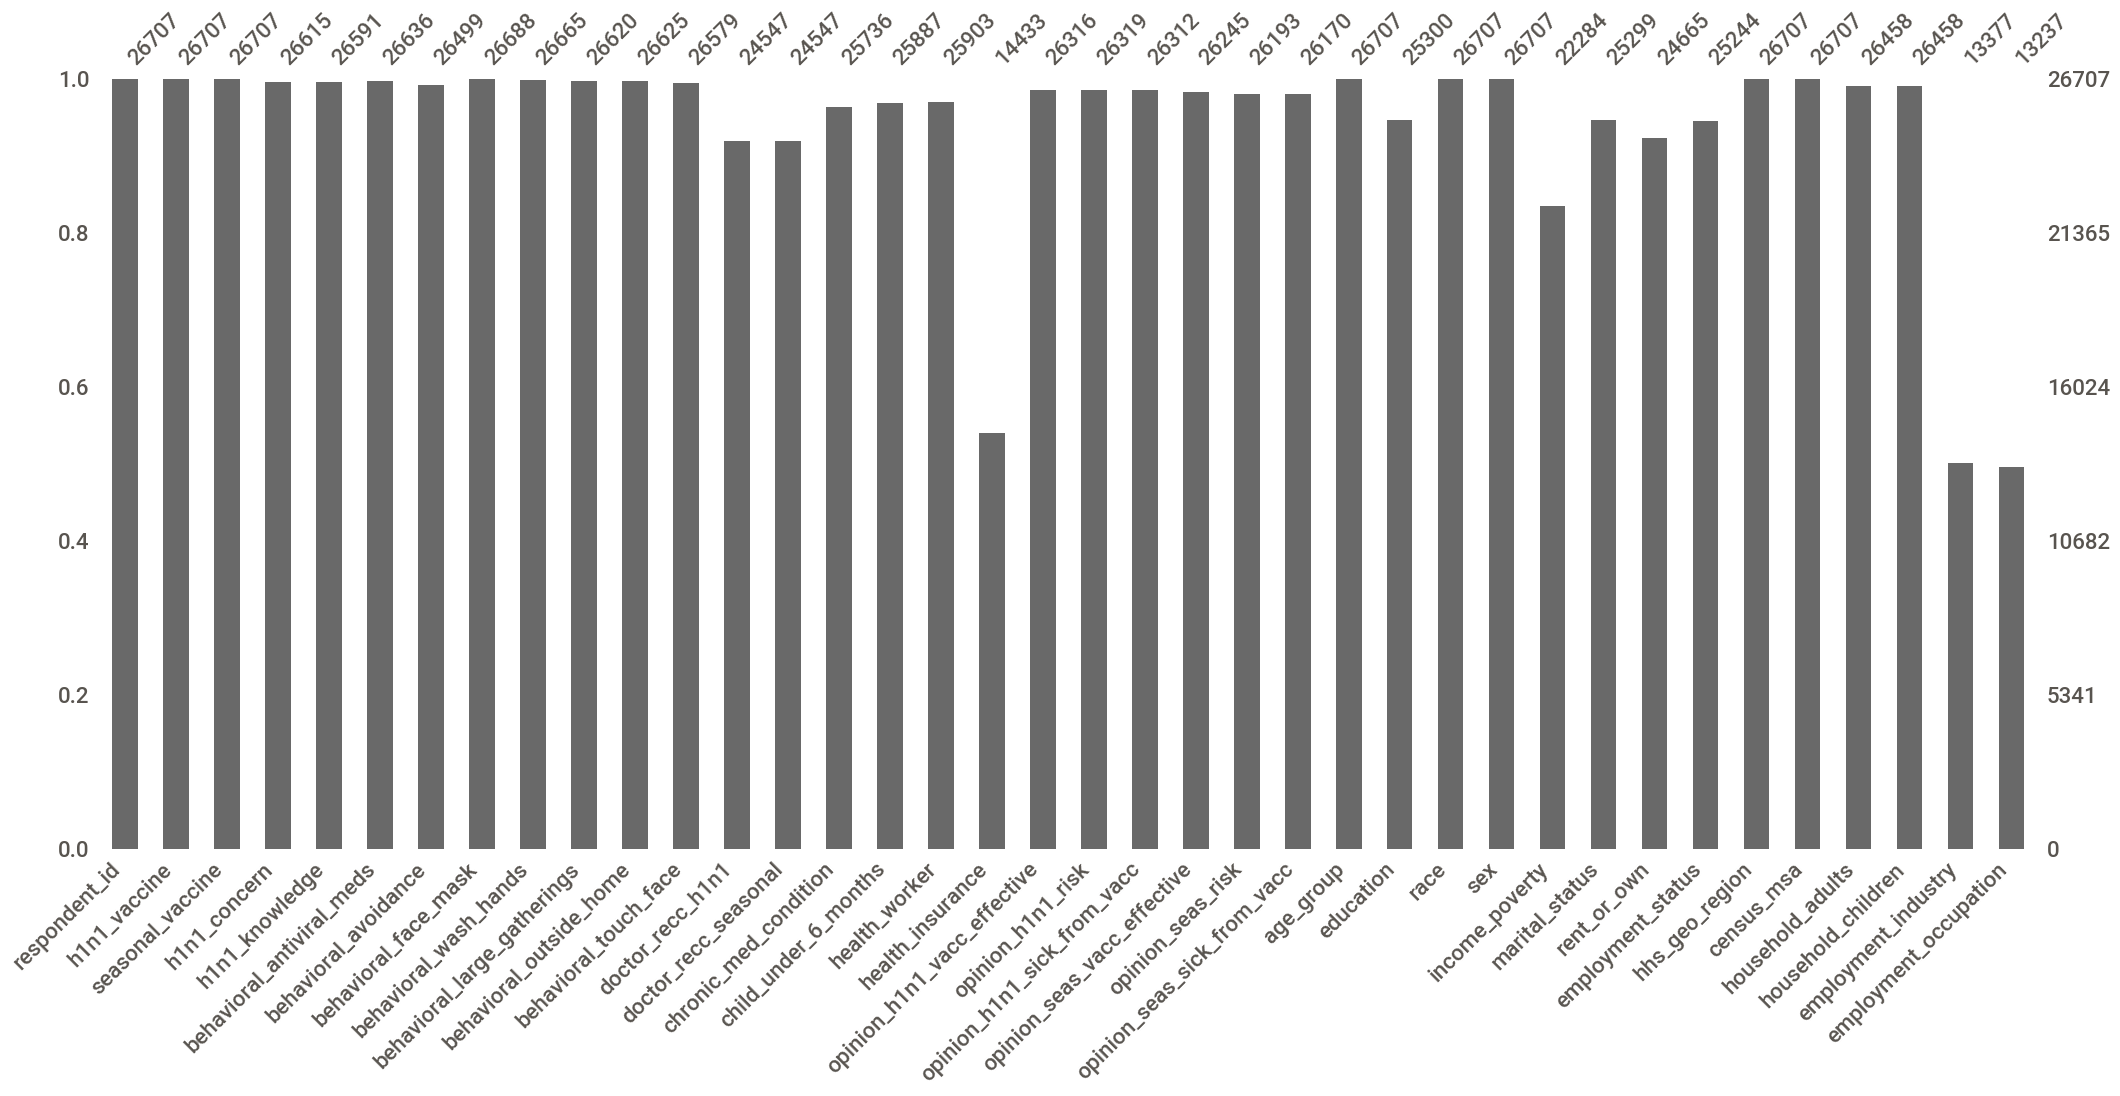

In [24]:
###################################
#         MISSING VALUES          #
###################################
print(flu_df.isnull().values.any())
print(flu_df.isnull().sum())

msno.bar(flu_df)
plt.show()


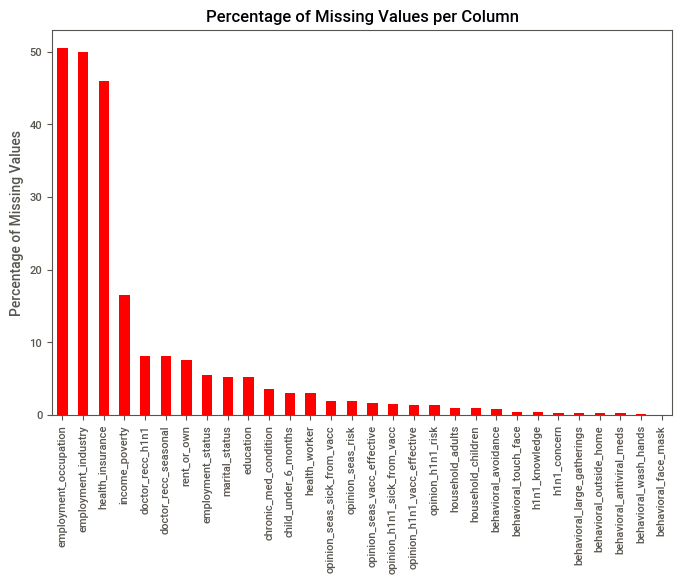

In [25]:
missing_values = (flu_df.isnull().sum() / len(flu_df)) * 100
missing_values = missing_values[missing_values > 0]
missing_values = missing_values.sort_values(ascending=False)

plt.figure(figsize=(8,5))
missing_values.plot(kind='bar', color='red')
plt.ylabel("Percentage of Missing Values")
plt.title("Percentage of Missing Values per Column")
plt.show()


In [26]:
###################################
#       PROFILE SUMMARY           #
###################################
import sweetviz as sv

report = sv.analyze(flu_df)
report.show_html("dataset_profile.html")



                                             |          | [  0%]   00:00 -> (? left)

Report dataset_profile.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [40]:
##################################################
# T1.1.3. SUMMARY STATS FOR FEATURES             #      
##################################################
cat_cols = flu_df.select_dtypes(include=['object', 'category']).columns
num_cols = flu_df.select_dtypes(include=['int64', 'float64']).columns

numeric_sum = flu_df[num_cols].describe().T
print("Summary statistics for numerical features:")
display(numeric_sum)

Summary statistics for numerical features:


,count,mean,std,min,25%,50%,75%,max
respondent_id,26707.0,13353.000000,7709.791156,0.0,6676.5,13353.0,20029.5,26706.0
h1n1_vaccine,26707.0,0.212454,0.409052,0.0,0.0,0.0,0.0,1.0
seasonal_vaccine,26707.0,0.465608,0.498825,0.0,0.0,0.0,1.0,1.0
h1n1_concern,26615.0,1.618486,0.910311,0.0,1.0,2.0,2.0,3.0
h1n1_knowledge,26591.0,1.262532,0.618149,0.0,1.0,1.0,2.0,2.0
behavioral_antiviral_meds,26636.0,0.048844,0.215545,0.0,0.0,0.0,0.0,1.0
behavioral_avoidance,26499.0,0.725612,0.446214,0.0,0.0,1.0,1.0,1.0
behavioral_face_mask,26688.0,0.068982,0.253429,0.0,0.0,0.0,0.0,1.0
behavioral_wash_hands,26665.0,0.825614,0.379448,0.0,1.0,1.0,1.0,1.0
behavioral_large_gatherings,26620.0,0.358640,0.479610,0.0,0.0,0.0,1.0,1.0


In [41]:
categorical_sum = flu_df[cat_cols].describe().T
print("\nSummary statistics for categorical features:")
display(categorical_sum) 


Summary statistics for categorical features:


,count,unique,top,freq
age_group,26707,5,65+ Years,6843
education,25300,4,College Graduate,10097
race,26707,4,White,21222
sex,26707,2,Female,15858
income_poverty,22284,3,"<= $75,000, Above Poverty",12777
marital_status,25299,2,Married,13555
rent_or_own,24665,2,Own,18736
employment_status,25244,3,Employed,13560
hhs_geo_region,26707,10,lzgpxyit,4297
census_msa,26707,3,"MSA, Not Principle City",11645


In [29]:
##################################################
#    VARIABLE DISTRIBUTIONS AND CLASS BALANCE    #      
##################################################

print(flu_df['h1n1_vaccine'].value_counts(normalize=True) * 100)
h1n1_dist = flu_df['h1n1_vaccine'].value_counts().reset_index()
h1n1_dist.columns = ['Class', 'Count']
h1n1_dist['Percentage'] = (h1n1_dist['Count'] / h1n1_dist['Count'].sum()) * 100
print(h1n1_dist)


h1n1_vaccine
0    78.754634
1    21.245366
Name: proportion, dtype: float64
   Class  Count  Percentage
0      0  21033   78.754634
1      1   5674   21.245366


In [30]:
print(flu_df['seasonal_vaccine'].value_counts(normalize=True) * 100)
seaonal_dist = flu_df['seasonal_vaccine'].value_counts().reset_index()
seaonal_dist.columns = ['Class', 'Count']
seaonal_dist['Percentage'] = (seaonal_dist['Count'] / seaonal_dist['Count'].sum()) * 100
print(seaonal_dist)

seasonal_vaccine
0    53.439173
1    46.560827
Name: proportion, dtype: float64
   Class  Count  Percentage
0      0  14272   53.439173
1      1  12435   46.560827


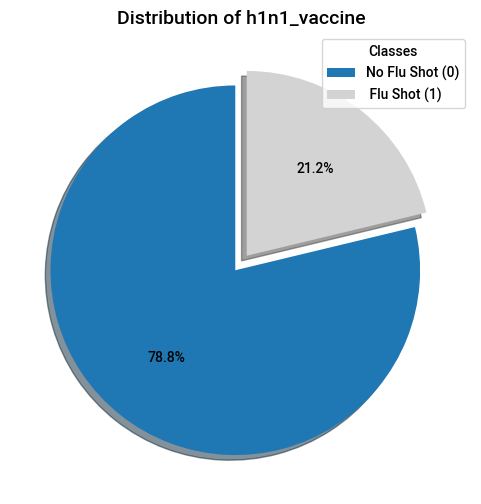

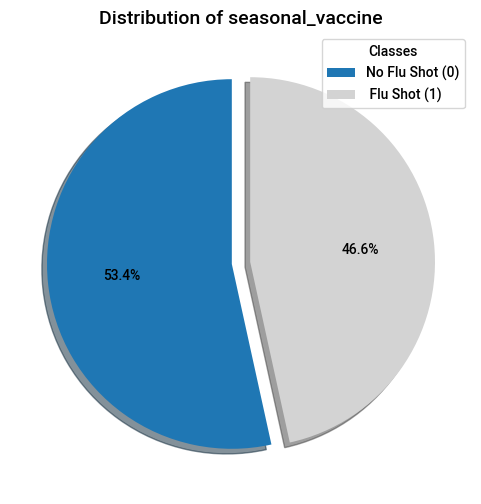

In [31]:
targets = ['h1n1_vaccine', 'seasonal_vaccine']

colors = ['#1f77b4', '#d3d3d3']
for col in targets:
    counts = flu_df[col].value_counts()
    
    counts = counts.sort_index()
    
    labels = ['No Flu Shot (0)', ' Flu Shot (1)']
    explode = [0.05] * len(counts)

    plt.figure(figsize=(6,6))
    wedges, texts, autotexts = plt.pie(
        counts,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors[:len(counts)],
        explode=explode,
        shadow=True
    )

    plt.title(f"Distribution of {col}", fontsize=14, fontweight='bold')
    plt.legend(wedges, labels, title="Classes", loc="upper right", fontsize=10)
    plt.show()

In [34]:
##################################################
# 1.1.4     QUESTIONS & OBSERVATIONS             #      
##################################################
# EMPLOYMENT & HEALTH INSURANCE HAD THE MOST MISSING VALUES.